In [100]:
#Import des librairies Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math as mth

In [101]:
#Import des fichiers csv extraits directement de la base de données de l’entreprise
df_transactions = pd.read_csv('transactions.csv') 
df_products = pd.read_csv('products.csv') 
df_customers = pd.read_csv('customers.csv') 

In [102]:
#Traitement des valeurs aberrantes 
#Tri rapide sur les 5 premières lignes du dataframe df_product (méthode .sort_values())
df_products.sort_values('id_prod', ascending = False)

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2
...,...,...,...
922,0_1000,6.84,0
663,0_100,20.60,0
2691,0_10,17.95,0
803,0_1,10.99,0


In [103]:
#Tri rapide sur les 5 premières lignes du dataframe df_product (méthode .sort_values())
df_products.sort_values('id_prod', ascending = False)

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2
...,...,...,...
922,0_1000,6.84,0
663,0_100,20.60,0
2691,0_10,17.95,0
803,0_1,10.99,0


In [104]:
#Suppression de la ligne index 731, la valeur n'a aucune signification logique
df_products = df_products[df_products.id_prod != 'T_0']

In [105]:
df_customers.sort_values('client_id',ascending=False)

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994
...,...,...,...
3426,c_1001,m,1982
8472,c_1000,f,1966
2137,c_100,m,1992
6894,c_10,m,1956


In [106]:
df_customers.sort_values('client_id',ascending=False)

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994
...,...,...,...
3426,c_1001,m,1982
8472,c_1000,f,1966
2137,c_100,m,1992
6894,c_10,m,1956


In [107]:
ct_0 = df_customers.loc[df_customers['client_id'] == 'ct_0']
ct_1 = df_customers.loc[df_customers['client_id'] == 'ct_1']


In [108]:
#On supprime ces deux valeurs en utilisant la méthode .drop().
df_customers.drop([2735, 8494], 0, inplace=True)
df_customers.sort_values('client_id')

,client_id,sex,birth
4299,c_1,m,1955
6894,c_10,m,1956
2137,c_100,m,1992
8472,c_1000,f,1966
3426,c_1001,m,1982
...,...,...,...
7004,c_995,m,1955
2788,c_996,f,1970
94,c_997,f,1994
2145,c_998,m,2001


In [109]:
df_transactions.sort_values('client_id',ascending=False)

,id_prod,date,session_id,client_id
298399,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
57261,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
77758,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
250656,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1
...,...,...,...,...
83342,0_1429,2021-10-15 11:28:24.523566,s_105105,c_1
321196,0_1547,2021-09-08 08:27:49.586711,s_86739,c_1
298829,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1
28406,1_713,2021-11-15 20:40:00.586010,s_120172,c_1


In [110]:
df_transactions.sort_values('client_id',ascending=False)

,id_prod,date,session_id,client_id
298399,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
57261,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
77758,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
250656,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1
...,...,...,...,...
83342,0_1429,2021-10-15 11:28:24.523566,s_105105,c_1
321196,0_1547,2021-09-08 08:27:49.586711,s_86739,c_1
298829,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1
28406,1_713,2021-11-15 20:40:00.586010,s_120172,c_1


In [111]:
#Suppression des valeurs test
df_transactions = df_transactions[df_transactions.id_prod != 'T_0']

In [112]:
df_transactions.date = pd.to_datetime(df_transactions.date).copy()

In [113]:
df100 = pd.merge(df_transactions,df_customers, on='client_id')
df100 = pd.merge(df100, df_products, on = 'id_prod')
df100['count'] = 1
df100 = df100.groupby('client_id').sum().reset_index()
df100 = df100.sort_values('count', ascending=False)
df100 = df100[['client_id', 'count']]
df100 = pd.merge(df100, df_customers, on='client_id')
df100 = df100.sort_values('count', ascending=False)
top_5 = df100.iloc[0:5]

In [114]:
mask = df_transactions.loc[(df_transactions['client_id'] == 'c_1609') | (df_transactions['client_id'] =='c_6714') | (df_transactions['client_id'] =='c_3454') | (df_transactions['client_id'] =='c_4958')]
outliers = mask.index.tolist()
df_transactions = df_transactions.drop(outliers)

In [115]:
df_transactions_products=pd.merge(df_transactions,df_products ,on='id_prod', how='left')

In [116]:
#cree un dataframe uniquement ou il ya des nan
df_missing_values = df_transactions_products[df_transactions_products.categ.isnull() == True]

In [117]:
#reperer ou il y a une valeur manquante
df_missing_values.id_prod.unique()

array(['0_2245'], dtype=object)

In [118]:
df_transactions_products['price'] = df_transactions_products.price.fillna(df_transactions_products.price.mean())

In [119]:
#Le produit id 0_2245 doit-être classifié en catégorie 0
df_transactions_products['categ'] = df_transactions_products.categ.fillna(0)

# Mission 2

In [120]:
#Evolution du chiffre d'affaire
df_transactions_mois = df_transactions_products.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
df_transactions_mois=df_transactions_mois[['date','price']]

In [121]:
df_transactions_mois

,date,price
0,2021-03-31,443093.036802
1,2021-04-30,436397.402758
2,2021-05-31,451448.763824
3,2021-06-30,444970.087868
4,2021-07-31,445724.821912
5,2021-08-31,443325.606802
6,2021-09-30,466955.595736
7,2021-10-31,295358.270846
8,2021-11-30,475283.509780
9,2021-12-31,484863.520846


Text(0, 0.5, 'Price Euro')

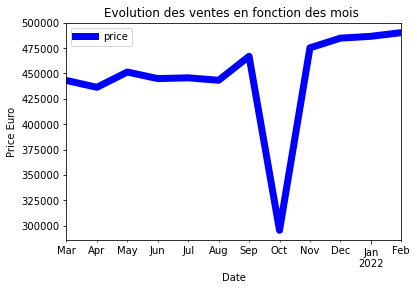

In [122]:
df_transactions_mois.plot(x='date',y='price', c='blue',lw=7)
plt.title('Evolution des ventes en fonction des mois ')
plt.xlabel('Date')
plt.ylabel('Price Euro')


In [123]:
transaction_octobre = len(df_transactions_products[(df_transactions_products.date > '2021-09-30') & \
                                                   (df_transactions_products.date < '2021-11-01')])
transaction_octobre

21273

In [124]:
transaction_septembre=len(df_transactions_products[(df_transactions_products.date > '2021-08-31') & \
                                                   (df_transactions_products.date < '2021-10-01')])
transaction_septembre

31687

In [125]:
#Création (par restriction des dates)du dataframe 'df_transactionsv1' excluant les transactions du mois d'octobre
df_transactions1 =  df_transactions[(df_transactions.date <= '2021-09-30') | (df_transactions.date >= '2021-11-01')]

In [126]:
#Nouvelle jointure pour agréger les valeurs 'transactionsv1' avec celles 'products' (méthode .merge())
df_transactions1_products = pd.merge(df_transactions1, df_products, on='id_prod')
df_transactions1_products

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0
1,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0
2,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0
3,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0
4,0_1483,2021-05-09 17:45:59.753345,s_32218,c_4690,4.99,0
...,...,...,...,...,...,...
292281,0_833,2021-09-27 23:22:40.394509,s_96558,c_8260,2.99,0
292282,0_1284,2021-04-14 13:13:06.560397,s_20477,c_1551,1.38,0
292283,0_1116,2021-07-27 04:02:53.408409,s_67633,c_3291,2.97,0
292284,0_527,2021-08-08 20:18:36.270422,s_73115,c_131,2.99,0


In [127]:
#tendance central et dispersion
#calcule de la moyenne 
df_transactions1_products['price'].describe()


count    292286.000000
mean         17.279671
std          17.621140
min           0.620000
25%           8.990000
50%          13.990000
75%          19.040000
max         300.000000
Name: price, dtype: float64

Text(0.5, 0, 'Prix des produit en Euro')

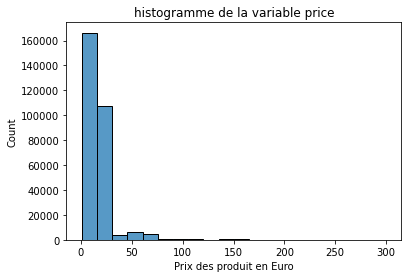

In [128]:
sns.histplot(x='price', data=df_transactions1_products,stat='count',bins=20)
plt.title('histogramme de la variable price')
plt.xlabel('Prix des produit en Euro')



In [129]:
#Analyse sectorielle par catégorie
effectif=df_transactions1_products['categ'].value_counts()
modalite=effectif.index

In [130]:
tab=pd.DataFrame(modalite, columns=['categ'] )

In [131]:
tab

,categ
0,0
1,1
2,2


In [132]:
tab['n']=effectif.values

In [133]:
tab

,categ,n
0,0,176873
1,1,100731
2,2,14682


In [134]:
tab['f']= tab['n']/len(df_transactions1_products)

In [135]:
tab

,categ,n,f
0,0,176873,0.605137
1,1,100731,0.344632
2,2,14682,0.050232


In [136]:
tab=tab.sort_values('categ')
tab["F"]=tab['f'].cumsum() #calcule la somme cumulé

In [137]:
tab

,categ,n,f,F
0,0,176873,0.605137,0.605137
1,1,100731,0.344632,0.949768
2,2,14682,0.050232,1.000000


Text(0.5, 1.0, 'Répartition des catégories en fonction des frequences')

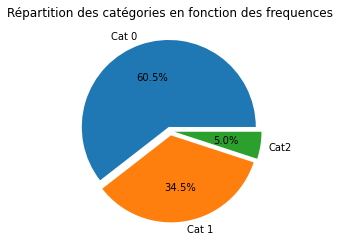

In [138]:
cat='Cat 0','Cat 1','Cat2'
exp=(0.05,0.05,0.05)
plt.pie(tab['f'], labels=cat, explode=exp, autopct='%1.1f%%',normalize=True);
plt.title('Répartition des catégories en fonction des frequences')



Text(0, 0.5, 'Price (€)')

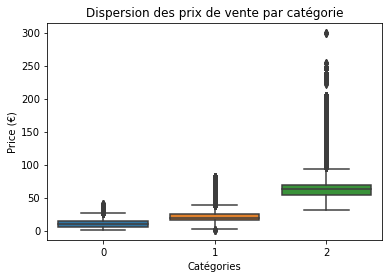

In [139]:
sns.boxplot(x='categ',y='price',data=df_transactions1_products)
plt.title('Dispersion des prix de vente par catégorie')
plt.xlabel('Catégories')
plt.ylabel('Price (€)')


In [140]:
#COMBIEN DE PRODUIT DISPO CAR CATEGORIE
CAT0=len(df_products[df_products.categ == 0].groupby('id_prod'))


CAT0


2308

In [141]:
CAT1=len(df_products[df_products.categ == 1].groupby('id_prod'))
CAT1

739

In [142]:
CAT2=len(df_products[df_products.categ == 2].groupby('id_prod'))
CAT2

239

In [143]:
#JOINTURE DATAFRAME CUSTOMERS ET TRANSACTION
df_transactions_customers=pd.merge(df_transactions1_products,df_customers, on='client_id')
df_transactions_customers

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0,f,1977
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0,f,1977
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0,f,1977
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0,f,1977
...,...,...,...,...,...,...,...,...
292281,0_1954,2022-01-01 15:43:23.657183,s_143438,c_5735,8.15,0,f,1996
292282,2_162,2021-04-21 11:50:23.354808,s_23649,c_3927,102.82,2,f,2003
292283,2_162,2021-06-03 03:55:54.925171,s_43342,c_755,102.82,2,f,1996
292284,2_213,2021-12-31 00:10:39.403811,s_142586,c_755,189.99,2,f,1996


In [144]:
df_transactions_customers['age']=2021-df_transactions_customers['birth']
df_transactions_customers

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0,f,1977,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0,f,1977,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0,f,1977,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0,f,1977,44
...,...,...,...,...,...,...,...,...,...
292281,0_1954,2022-01-01 15:43:23.657183,s_143438,c_5735,8.15,0,f,1996,25
292282,2_162,2021-04-21 11:50:23.354808,s_23649,c_3927,102.82,2,f,2003,18
292283,2_162,2021-06-03 03:55:54.925171,s_43342,c_755,102.82,2,f,1996,25
292284,2_213,2021-12-31 00:10:39.403811,s_142586,c_755,189.99,2,f,1996,25


les clients les plus nombreux on entre 30 et 55 ans 


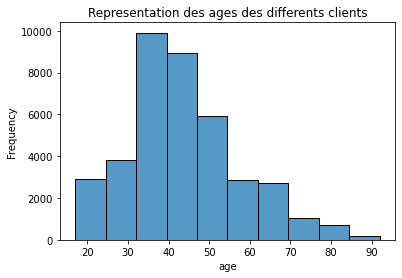

In [145]:
sns.histplot(x='age', data=df_transactions_customers,stat='frequency',bins=10)
plt.title('Representation des ages des differents clients')
plt.xlabel('age')
print("les clients les plus nombreux on entre 30 et 55 ans ")
plt.show()

In [146]:
df_transactions_customers.sex.describe()

count     292286
unique         2
top            f
freq      152243
Name: sex, dtype: object

In [147]:
df_transactions_customers.sex.value_counts()

f    152243
m    140043
Name: sex, dtype: int64

In [148]:
rds=df_transactions_customers.pivot_table(index='sex',columns='categ',values='id_prod',aggfunc='count').reset_index()

In [149]:
rds

categ,sex,0,1,2
0,f,91837,52841,7565
1,m,85036,47890,7117


Text(0, 0.5, "Montant d'achat")

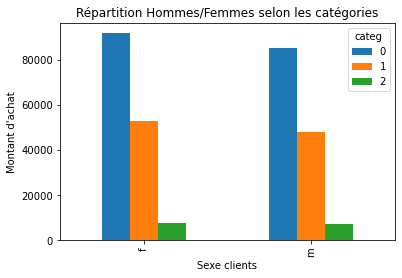

In [150]:

rds.plot(kind='bar', x='sex')

plt.title('Répartition Hommes/Femmes selon les catégories')
plt.xlabel('Sexe clients')
plt.ylabel("Montant d'achat")

In [151]:
#Analyser les differents comportements des consommateurs
df1=pd.merge(df_customers,df_transactions1_products)
df1.head()


,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092,11.53,0
1,c_4410,f,1967,0_1390,2021-09-24 23:35:40.652636,s_94984,19.37,0
2,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1
3,c_4410,f,1967,1_267,2021-09-24 23:15:59.919591,s_94984,27.99,1
4,c_4410,f,1967,1_395,2021-09-24 23:57:35.138518,s_94984,28.99,1


In [152]:
fidelisation=df1.groupby('client_id').count().reset_index()

In [153]:
fidelisation

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_1,19,19,19,19,19,19,19
1,c_10,28,28,28,28,28,28,28
2,c_100,6,6,6,6,6,6,6
3,c_1000,53,53,53,53,53,53,53
4,c_1001,51,51,51,51,51,51,51
...,...,...,...,...,...,...,...,...
8589,c_995,8,8,8,8,8,8,8
8590,c_996,41,41,41,41,41,41,41
8591,c_997,22,22,22,22,22,22,22
8592,c_998,28,28,28,28,28,28,28


In [154]:
fidelisation['nb_transaction']=fidelisation.session_id

In [155]:
fidelisation

,client_id,sex,birth,id_prod,date,session_id,price,categ,nb_transaction
0,c_1,19,19,19,19,19,19,19,19
1,c_10,28,28,28,28,28,28,28,28
2,c_100,6,6,6,6,6,6,6,6
3,c_1000,53,53,53,53,53,53,53,53
4,c_1001,51,51,51,51,51,51,51,51
...,...,...,...,...,...,...,...,...,...
8589,c_995,8,8,8,8,8,8,8,8
8590,c_996,41,41,41,41,41,41,41,41
8591,c_997,22,22,22,22,22,22,22,22
8592,c_998,28,28,28,28,28,28,28,28


In [156]:
fidelisation = fidelisation[['client_id', 'nb_transaction']]
fidelisation.head()

,client_id,nb_transaction
0,c_1,19
1,c_10,28
2,c_100,6
3,c_1000,53
4,c_1001,51


In [157]:
fidelisation.shape

(8594, 2)

In [158]:
#Client qui passer plus de 1 commande 
fidelisation[fidelisation['nb_transaction']>1].shape[0]

8548

In [159]:
fidelisation[fidelisation['nb_transaction'] ==1].shape[0]

46

In [160]:
fidelisation[fidelisation['nb_transaction']==2].shape[0]


99

In [161]:
df2 = df1.groupby('client_id').sum().reset_index()
df2 = df1.sort_values(by='price')
df2['count']=1
df2['client_cumul']=df2['count'].cumsum()
df2

,client_id,sex,birth,id_prod,date,session_id,price,categ,count,client_cumul
237144,c_5277,m,1976,0_202,2021-03-05 17:06:24.511487,s_2176,0.62,0,1,1
209299,c_1367,f,1984,0_202,2021-08-02 23:27:31.721723,s_70595,0.62,0,1,2
6452,c_7075,m,1988,0_528,2021-06-20 20:31:40.948364,s_51439,0.62,0,1,3
231092,c_5510,f,1941,0_202,2021-05-14 15:26:20.597059,s_34456,0.62,0,1,4
25387,c_3297,f,1975,0_202,2021-04-08 17:47:18.158963,s_17806,0.62,0,1,5
...,...,...,...,...,...,...,...,...,...,...
157217,c_659,f,2001,2_2,2022-02-28 21:24:28.442508,s_172373,300.00,2,1,292282
198707,c_2467,f,1997,2_2,2021-06-06 23:14:33.815188,s_45088,300.00,2,1,292283
82679,c_2329,f,1996,2_2,2021-05-02 18:34:47.753888,s_28956,300.00,2,1,292284
116995,c_1001,m,1982,2_2,2021-03-07 14:07:31.004391,s_3041,300.00,2,1,292285


In [162]:
#indice de geni

def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

X = np.array(df2['client_cumul'])
print('Indice de Gini : ', gini(X))

Indice de Gini :  0.3333321928978239


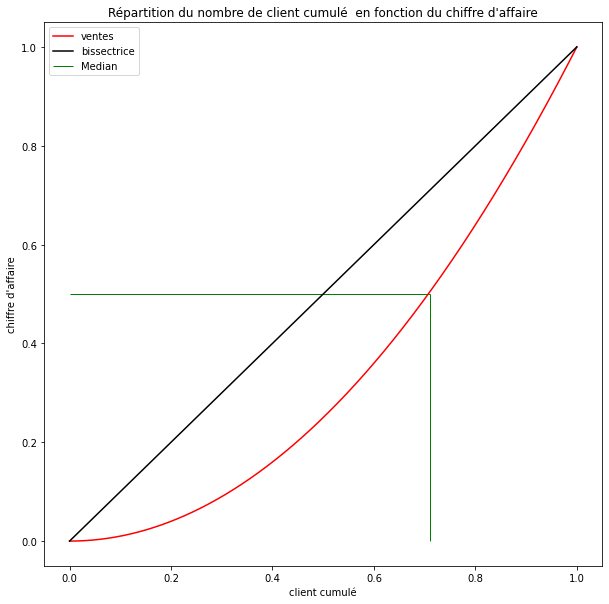

In [163]:
#courbe de lorenz



X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

fig, ax = plt.subplots(figsize=[10,10])
_ = ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, color='red', label='ventes')
_ = ax.plot([0,1], [0,1], color='k', label='bissectrice')
_ = plt.vlines(x=0.71, ymin=0, ymax=0.5, color='green', linestyle='-', linewidth=1, label='Median')
_ = plt.hlines(xmin=0.71, xmax=0, y=0.5, color='green', linestyle='-', linewidth=1)
_ = plt.xlabel('client cumulé')
_ = plt.ylabel("chiffre d'affaire")
_ = plt.title("Répartition du nombre de client cumulé  en fonction du chiffre d'affaire")
_ = plt.legend()

_ 

_ = plt.show()

In [164]:
#Analyse du comportement via les catégories de produit
#produit vendu par categorie
Interet_client=df1.groupby('categ').count().reset_index()

In [165]:
Interet_client

,categ,client_id,sex,birth,id_prod,date,session_id,price
0,0,176873,176873,176873,176873,176873,176873,176873
1,1,100731,100731,100731,100731,100731,100731,100731
2,2,14682,14682,14682,14682,14682,14682,14682


In [166]:
#chiffre d'affaire par categorie 
CA_categ=df1.groupby('categ').price.sum().reset_index()
CA_categ

,categ,price
0,0,1.883449e+06
1,1,2.063146e+06
2,2,1.104011e+06


# Mission 3

# Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [167]:

#Adaptation des  2 variables qualitatives je souhaite étudier en  lignes 1 et 2. Le tableau de contingence se calcule grâce à la méthode  pivot_table
X = "sex"
Y = "categ"

c= df1[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
tx = df1[X].value_counts()
ty = df1[Y].value_counts()
cont=c.copy()

cont

categ,0,1,2
sex,,,
f,91837,52841,7565
m,85036,47890,7117


In [168]:
#calcule du tableau indep 

tx_df1= pd.DataFrame(tx)
ty_df1 = pd.DataFrame(ty)

tx_df1.columns = ["s"]
ty_df1.columns = ["s"]
n = len(df1)
indep = (tx_df1.dot(ty_df1.T) / n)



In [169]:
indep

,0,1,2
f,92127.834173,52467.75293,7647.412897
m,84745.165827,48263.24707,7034.587103


In [170]:
#measure  contient tous les ξij pour chaque case du tableau. On peut ensuite 
#calculer les contributions (que nous avons définies plus haut) en divisant chaque ξij par ξn (placé dans la variable xi_n  ). 
c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
#calcule du chi-2
xi_n = measure.sum().sum()
table = measure/xi_n


In [171]:
measure

categ,0,1,2
sex,,,
f,0.918121,2.655219,0.888129
m,0.998104,2.886531,0.965499


Text(33.0, 0.5, 'Sexe')

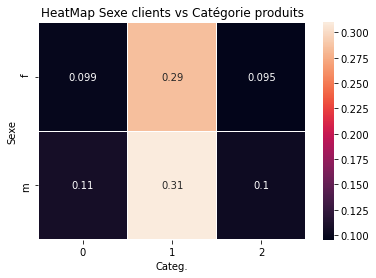

In [172]:
#heatmap
sns.heatmap(table, annot=True, linewidths=0.1)

plt.title('HeatMap Sexe clients vs Catégorie produits')
plt.xlabel('Categ.')
plt.ylabel('Sexe')

In [181]:
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(9.311603202842303, 2, 0.009506289931424652)

# Y a-t-il une corrélation entre l'âge des clients et Le montant total des achats ?

In [182]:
age_price=df1

In [183]:
age_price.loc[((age_price['age']>16) & (age_price['age']<= 30)),'classe_age']='17-30'
age_price.loc[((age_price['age']>30) & (age_price['age']<= 50)),'classe_age']='30-50'
age_price.loc[((age_price['age']>=51)),'classe_age']='51+'


In [184]:
age_price.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,classe_age
0,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092,11.53,0,54,51+
1,c_4410,f,1967,0_1390,2021-09-24 23:35:40.652636,s_94984,19.37,0,54,51+
2,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1,54,51+
3,c_4410,f,1967,1_267,2021-09-24 23:15:59.919591,s_94984,27.99,1,54,51+
4,c_4410,f,1967,1_395,2021-09-24 23:57:35.138518,s_94984,28.99,1,54,51+


In [190]:
age_price = age_price.groupby(by=['client_id', 'classe_age']).sum()
age_price = age_price.dropna().reset_index()

In [191]:
age_price

,client_id,classe_age,birth,price,categ,age
0,c_1,51+,37145,292.66,6,1254
1,c_10,51+,54768,586.18,19,1820
2,c_100,17-30,11952,222.87,5,174
3,c_1000,51+,104198,928.05,34,2915
4,c_1001,30-50,101082,1001.54,16,1989
...,...,...,...,...,...,...
8589,c_995,51+,15640,119.08,3,528
8590,c_996,51+,80770,725.61,25,2091
8591,c_997,17-30,43868,514.90,17,594
8592,c_998,17-30,56028,1527.69,36,560


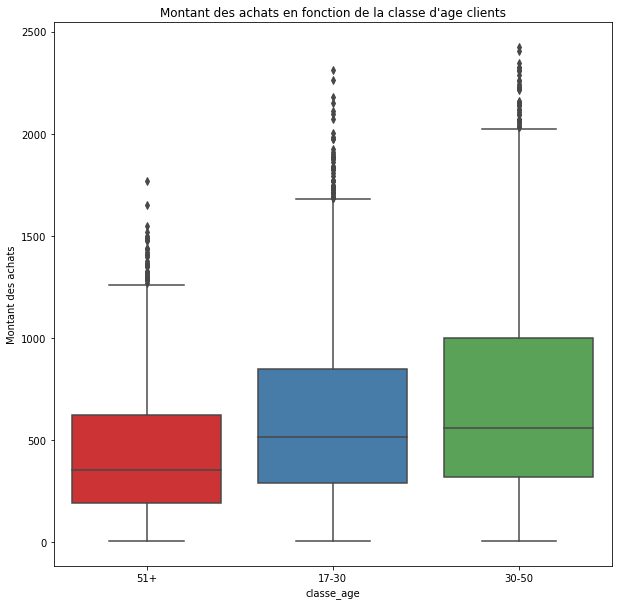

In [213]:
sns.set_palette('Set1')
plt.figure(figsize=[10,10])

sns.boxplot(x='classe_age', y='price', data=age_price)
plt.ylabel('Montant des achats')
plt.title("Montant des achats en fonction de la classe d'age clients")
plt.show()


In [193]:
X = "classe_age" 
Y = "price"

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(age_price[X],age_price[Y])

0.06985561877830126

In [194]:
#Le coefficient eta² montre une forte corrélation entre la classe d'âge et le montant total des achats.
#Les clients de la tranche d'âge 30-50 ans ont tendance à dépenser plus que les clients des deux autres tranches d'âge.

# Y a-t-il une corrélation entre l'âge des clients et La fréquence d’achat (ie. nombre d'achats par mois par exemple) ?

In [195]:
age_frequence=df1.groupby('age').count().reset_index()

In [196]:
age_frequence=age_frequence[['age','session_id']].sort_values('age', ascending=False )

In [197]:
age_frequence.loc[((age_frequence['age']>16) & (age_frequence['age']<= 30)),'classe_age']='17-30'
age_frequence.loc[((age_frequence['age']>30) & (age_frequence['age']<= 50)),'classe_age']='30-50'
age_frequence.loc[((age_frequence['age']>=51)),'classe_age']='51+'


In [198]:
age_frequence.head()

,age,session_id,classe_age
75,92,84,51+
74,91,111,51+
73,90,78,51+
72,89,141,51+
71,88,150,51+


In [199]:
age_frequence['f']=age_frequence['session_id']/age_frequence['session_id'].sum()

In [200]:
age_frequence

,age,session_id,classe_age,f
75,92,84,51+,0.000287
74,91,111,51+,0.000380
73,90,78,51+,0.000267
72,89,141,51+,0.000482
71,88,150,51+,0.000513
...,...,...,...,...
4,21,2054,17-30,0.007027
3,20,1936,17-30,0.006624
2,19,2087,17-30,0.007140
1,18,2048,17-30,0.007007


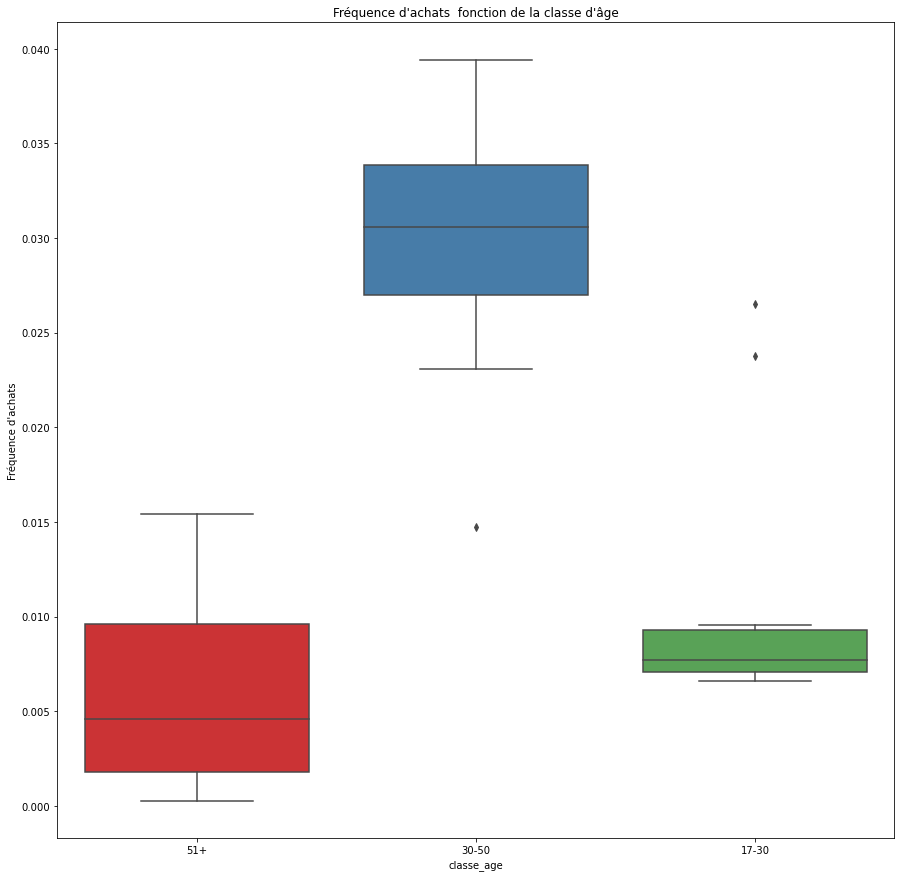

In [201]:
plt.figure(figsize=[15,15])

sns.boxplot(x='classe_age', y='f', data=age_frequence)
plt.ylabel("Fréquence d'achats")
plt.title("Fréquence d'achats  fonction de la classe d'âge")


plt.show()

In [202]:
X = "classe_age" # qualitative
Y = "f" # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(age_frequence[X],age_frequence[Y])


0.7925021513061684

In [203]:
#le coefficient eta carré de notre Anova montre une forte corrélation entre la fréquence d'achat et la classe d'age 

# Y a-t-il une corrélation entre l'âge des clients et La taille du panier moyen (en nombre d’articles) ?

In [204]:


age_panier=df1.groupby(['age','session_id']).count().reset_index()



age_panier.loc[((age_panier['age']>16) & (age_panier['age']<= 30)),'classe_age']='17-30'
age_panier.loc[((age_panier['age']>30) & (age_panier['age']<= 50)),'classe_age']='30-50'
age_panier.loc[((age_panier['age']>=51)),'classe_age']='51+'


In [205]:
#Seconde agrégation 

age_panier = age_panier[['classe_age', 'id_prod']]
age_panier.rename(columns={'id_prod': 'panier_moyen'}, inplace=True)
age_panier.tail()

,classe_age,panier_moyen
146542,51+,1
146543,51+,4
146544,51+,1
146545,51+,2
146546,51+,5


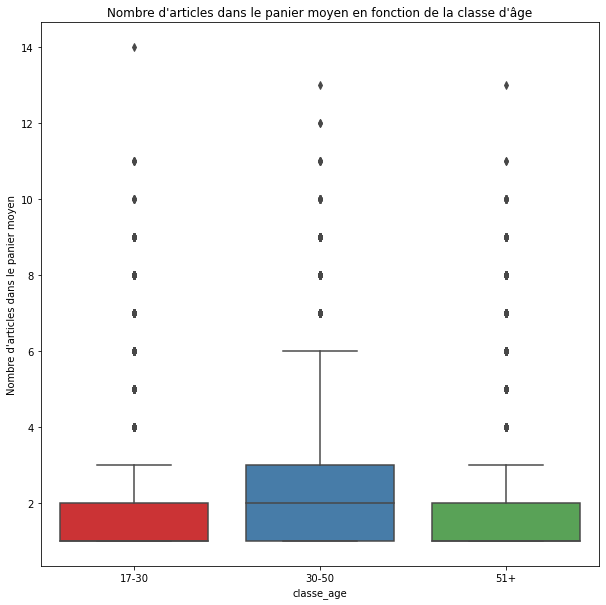

In [206]:

plt.figure(figsize=[10,10])

sns.boxplot(x='classe_age', y='panier_moyen', data=age_panier,palette="Set1")
plt.ylabel("Nombre d'articles dans le panier moyen")
plt.title("Nombre d'articles dans le panier moyen en fonction de la classe d'âge")

plt.show()


In [207]:
X = "classe_age" # qualitative
Y = "panier_moyen" # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(age_panier[X],age_panier[Y])

0.11064348686029199

In [208]:
#Le coefficient eta² montre une corrélation moyenne entre les deux variables.
#On peut distinguer que les client de la tranche d'age 30-50 ont un plus gros panier moyen

# Analyse de la corrélation entre l'âge clients et la catégorie produits

In [209]:
X ="categ"
Y = "age"

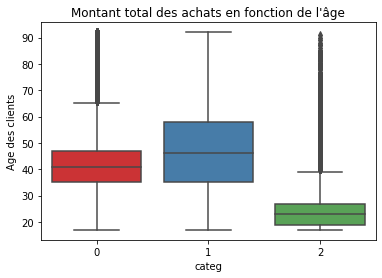

In [210]:
modalites = df1[X].unique()
groupes = []
for m in modalites:
    groupes.append(df1[df1[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
#plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            #vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
sns.boxplot(x='categ', y='age', data=df1,palette="Set1")
plt.ylabel('Age des clients')
plt.title("Montant total des achats en fonction de l'âge")

plt.show()

In [211]:
X = "categ" # qualitative
Y = "age" # quantitative



def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df1[X],df1[Y])

0.11263070078655023

In [212]:
#Le coefficient eta² montre une corrélation moyenne entre l'âge des clients et la catégorie d'achat. 
#Les clients les plus jeunes vont essentiellement se tourner vers l'achat de catégorie 2